# ***Data Analysis and Models Creation***

# Paper: **Discrimination of essential oils exposed and non-exposed to gamma rays using Raman spectroscopy and machine learning**

### **Authors:** *Paul Vargas Jentzsch (a), Sebastián Sarasti Zambonino (a), Daniela Ramirez (a), Gonzalo Jácome Camacho (a), Marco Sinche Serra (a), Edwin Vera (b), Roque Santos(a), Luis Ramos Guerrero (c), Valerian Ciobotă (d)

### **Notebook created by:** **Sebastián Sarasti Zambonino**

### **Institutions:**
a) Departamento de Ciencias Nucleares, Facultad de Ingeniería
Química y Agroindustria, Escuela Politécnica Nacional,
Ladrón de Guevara E11-253, 170525 Quito, Ecuador

b) Departamento de Ciencias de Alimentos y Biotecnología, Facultad de Ingeniería
Química y Agroindustria, Escuela Politécnica Nacional,
Ladrón de Guevara E11-253, 170525 Quito, Ecuador

c) Centro de Investigación de Alimentos, CIAL, Universidad UTE, 
Av. Mariscal Sucre y Mariana de Jesús, 170527 Quito, Ecuador

d) Rigaku Analytical Devices, Inc.,
30 Upton Drive, Suite 2
01887 Wilmington, USA

## Important announcement

This notebook serves as a guide throughout all the work done for the data analysis and model creation. Running the notebook is expensive, be careful with that. If you had any question, please, you should reach Sebastian Sarasti Zambonino out by his e-mail (sebastian.sarasti@epn.edu.ec). 

## Data Processing

Import basic libraries

In [ ]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mount drive and load data

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title
df1 = pd.read_csv('/content/drive/MyDrive/#6 Aceites irradiados/Data structured/data_irradiation_1.csv', index_col = 0)
df2 = pd.read_csv('/content/drive/MyDrive/#6 Aceites irradiados/Data structured/data_irradiation_2.csv', index_col = 0)
df3 = pd.read_csv('/content/drive/MyDrive/#6 Aceites irradiados/Data structured/data_irradiation_3.csv', index_col = 0)
df4 = pd.read_csv('/content/drive/MyDrive/#6 Aceites irradiados/Data structured/data_irradiation_4.csv', index_col = 0)

Concat the dataframes to have only one

In [ ]:
#@title
df_final = pd.concat([df1, df2, df3, df4])

In [ ]:
#@title
df_final.Date = pd.to_datetime(df_final.Date)

Get the 70 percent of the DF for training the rest for test

In [ ]:
#@title
from sklearn.model_selection import train_test_split

In [ ]:
#@title
train, test =  train_test_split(df_final, test_size = 0.3, random_state = 99)

In [ ]:
#@title
test.to_csv('test_data.csv')

Execute the same with the train over df_final

In [ ]:
#@title
df_final = train

## Simple Exploratory Data Analysis

Verify when data was collected

In [ ]:
#@title
days = df_final.groupby(by=[df_final['Date'].dt.month, df_final['Date'].dt.year]).count()['Date']

<AxesSubplot:xlabel='Date,Date'>

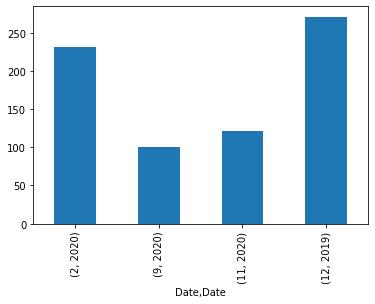

In [ ]:
#@title
days.plot(kind='bar')

Verify duplicated values along the DF for the X axis

In [ ]:
#@title
df_final.iloc[:, :511].duplicated().sum()

717

##  Machine Learning Modeling Test

In this part, it was built several machine learning algoritms to prove how each approach gives the best result

### Create a model with the all dataset columns

**1. Dose calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, :1022]
Y = df_final.loc[:, 'Dosis']

In [ ]:
#@title
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       145
        10.0       0.82      0.91      0.86       213
        15.0       0.86      0.78      0.82       164
        20.0       0.90      0.92      0.91       201

    accuracy                           0.89       723
   macro avg       0.90      0.89      0.89       723
weighted avg       0.89      0.89      0.89       723



**2. Irradiation Stage Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, :1022]
Y = df_final.loc[:, 'Irradiation Stage']

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

                precision    recall  f1-score   support

Not irradiated       0.99      0.92      0.95       145
           Oil       0.99      0.96      0.98       253
        Sample       0.94      0.99      0.96       325

      accuracy                           0.96       723
     macro avg       0.97      0.96      0.96       723
  weighted avg       0.97      0.96      0.96       723



**3. Only Irradiation Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, :1022]
Y = df_final.loc[:, 'Irradiation']

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       145
           1       0.98      1.00      0.99       578

    accuracy                           0.98       723
   macro avg       0.99      0.96      0.97       723
weighted avg       0.98      0.98      0.98       723



### Create a model with the only Raman columns

**1. Dose calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Dosis']

In [ ]:
#@title
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       145
        10.0       0.78      0.91      0.84       213
        15.0       0.84      0.69      0.76       164
        20.0       0.85      0.86      0.85       201

    accuracy                           0.85       723
   macro avg       0.86      0.84      0.85       723
weighted avg       0.85      0.85      0.85       723



**2. Irradiation Stage Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Irradiation Stage']

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

                precision    recall  f1-score   support

Not irradiated       0.96      0.93      0.95       145
           Oil       0.99      0.97      0.98       253
        Sample       0.95      0.98      0.96       325

      accuracy                           0.97       723
     macro avg       0.97      0.96      0.96       723
  weighted avg       0.97      0.97      0.97       723



**3. Only Irradiation Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Irradiation']

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       145
           1       0.98      0.99      0.98       578

    accuracy                           0.98       723
   macro avg       0.97      0.95      0.96       723
weighted avg       0.98      0.98      0.97       723



### Create a model with the all columns and a MinMax Scaler

**1. Dose calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, :1022]
Y = df_final.loc[:, 'Dosis']

In [ ]:
#@title
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#@title
scaler = MinMaxScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97       145
        10.0       0.82      0.92      0.87       213
        15.0       0.86      0.74      0.79       164
        20.0       0.91      0.93      0.92       201

    accuracy                           0.89       723
   macro avg       0.89      0.88      0.89       723
weighted avg       0.89      0.89      0.88       723



**2. Irradiation Stage Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, :1022]
Y = df_final.loc[:, 'Irradiation Stage']

In [ ]:
#@title
scaler = MinMaxScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

                precision    recall  f1-score   support

Not irradiated       1.00      0.92      0.96       145
           Oil       0.99      0.96      0.98       253
        Sample       0.94      0.99      0.97       325

      accuracy                           0.97       723
     macro avg       0.98      0.96      0.97       723
  weighted avg       0.97      0.97      0.97       723



**3. Only Irradiation Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, :1022]
Y = df_final.loc[:, 'Irradiation']

In [ ]:
#@title
scaler = MinMaxScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       145
           1       0.98      1.00      0.99       578

    accuracy                           0.98       723
   macro avg       0.98      0.96      0.97       723
weighted avg       0.98      0.98      0.98       723



### Create a model with only Raman columns and a MinMax Scaler

**1. Dose calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Dosis']

In [ ]:
#@title
scaler = MinMaxScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       145
        10.0       0.79      0.90      0.84       213
        15.0       0.85      0.71      0.77       164
        20.0       0.86      0.86      0.86       201

    accuracy                           0.85       723
   macro avg       0.86      0.85      0.85       723
weighted avg       0.85      0.85      0.85       723



**2. Irradiation Stage Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Irradiation Stage']

In [ ]:
#@title
scaler = MinMaxScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

                precision    recall  f1-score   support

Not irradiated       0.98      0.90      0.94       145
           Oil       0.99      0.97      0.98       253
        Sample       0.93      0.98      0.96       325

      accuracy                           0.96       723
     macro avg       0.97      0.95      0.96       723
  weighted avg       0.96      0.96      0.96       723



**3. Only Irradiation Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Irradiation']

In [ ]:
#@title
scaler = MinMaxScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       145
           1       0.97      0.99      0.98       578

    accuracy                           0.97       723
   macro avg       0.97      0.94      0.95       723
weighted avg       0.97      0.97      0.97       723



### Create a model with the all columns and a Standard Scaler

In [ ]:
#@title
from sklearn.preprocessing import StandardScaler

**1. Dose calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, :1022]
Y = df_final.loc[:, 'Dosis']

In [ ]:
#@title
scaler = StandardScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       145
        10.0       0.83      0.91      0.87       213
        15.0       0.87      0.75      0.81       164
        20.0       0.88      0.91      0.89       201

    accuracy                           0.88       723
   macro avg       0.89      0.88      0.88       723
weighted avg       0.88      0.88      0.88       723



**2. Irradiation Stage Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, :1022]
Y = df_final.loc[:, 'Irradiation Stage']

In [ ]:
#@title
scaler = StandardScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

                precision    recall  f1-score   support

Not irradiated       0.99      0.92      0.95       145
           Oil       0.99      0.97      0.98       253
        Sample       0.94      0.99      0.97       325

      accuracy                           0.97       723
     macro avg       0.97      0.96      0.97       723
  weighted avg       0.97      0.97      0.97       723



**3. Only Irradiation Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, :1022]
Y = df_final.loc[:, 'Irradiation']

In [ ]:
#@title
scaler = StandardScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       145
           1       0.98      1.00      0.99       578

    accuracy                           0.98       723
   macro avg       0.99      0.96      0.97       723
weighted avg       0.98      0.98      0.98       723



### Create a model with only Raman columns and a Standard Scaler

**1. Dose calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Dosis']

In [ ]:
#@title
scaler = StandardScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       145
        10.0       0.80      0.91      0.85       213
        15.0       0.85      0.71      0.77       164
        20.0       0.86      0.86      0.86       201

    accuracy                           0.86       723
   macro avg       0.87      0.85      0.86       723
weighted avg       0.86      0.86      0.85       723



**2. Irradiation Stage Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Irradiation Stage']

In [ ]:
#@title
scaler = StandardScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

                precision    recall  f1-score   support

Not irradiated       0.95      0.90      0.93       145
           Oil       0.98      0.97      0.98       253
        Sample       0.94      0.97      0.96       325

      accuracy                           0.96       723
     macro avg       0.96      0.95      0.95       723
  weighted avg       0.96      0.96      0.96       723



**3. Only Irradiation Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Irradiation']

In [ ]:
#@title
scaler = StandardScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       145
           1       0.97      0.99      0.98       578

    accuracy                           0.97       723
   macro avg       0.97      0.94      0.96       723
weighted avg       0.97      0.97      0.97       723



### Create a model with the only Raman squashed by the sqrt

**1. Dose calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Dosis']

In [ ]:
#@title
X = X.applymap(np.sqrt)

In [ ]:
#@title
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       145
        10.0       0.79      0.90      0.84       213
        15.0       0.85      0.74      0.79       164
        20.0       0.89      0.87      0.88       201

    accuracy                           0.86       723
   macro avg       0.87      0.86      0.87       723
weighted avg       0.87      0.86      0.86       723



**2. Irradiation Stage Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Irradiation Stage']

In [ ]:
#@title
X = X.applymap(np.sqrt)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

                precision    recall  f1-score   support

Not irradiated       0.99      0.91      0.95       145
           Oil       0.99      0.97      0.98       253
        Sample       0.94      0.99      0.96       325

      accuracy                           0.97       723
     macro avg       0.97      0.96      0.96       723
  weighted avg       0.97      0.97      0.97       723



**3. Only Irradiation Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Irradiation']

In [ ]:
#@title
X = X.applymap(np.sqrt)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       145
           1       0.98      1.00      0.99       578

    accuracy                           0.98       723
   macro avg       0.98      0.95      0.96       723
weighted avg       0.98      0.98      0.98       723



### Create a model with the only Raman squashed by the sigmoid squashing

**1. Dose calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Dosis']

In [ ]:
#@title
def my_func(x):
    return (1 - np.cos(np.pi * x)) / 2

In [ ]:
#@title
X = X.applymap(my_func)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.29      0.07      0.11       145
        10.0       0.32      0.58      0.41       213
        15.0       0.22      0.10      0.14       164
        20.0       0.26      0.29      0.27       201

    accuracy                           0.29       723
   macro avg       0.27      0.26      0.23       723
weighted avg       0.27      0.29      0.25       723



**2. Irradiation Stage Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Irradiation Stage']

In [ ]:
#@title
def my_func(x):
    return (1 - np.cos(np.pi * x)) / 2

In [ ]:
#@title
X = X.applymap(my_func)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

                precision    recall  f1-score   support

Not irradiated       0.00      0.00      0.00       145
           Oil       0.37      0.21      0.27       253
        Sample       0.45      0.80      0.58       325

      accuracy                           0.43       723
     macro avg       0.27      0.34      0.28       723
  weighted avg       0.33      0.43      0.35       723



**3. Only Irradiation Calculation**

Extract data which all columns

In [ ]:
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Irradiation']

In [ ]:
#@title
def my_func(x):
    return (1 - np.cos(np.pi * x)) / 2

In [ ]:
#@title
X = X.applymap(my_func)

In [ ]:
#@title
# create a simple model
model = RandomForestClassifier()

In [ ]:
#@title
# Make a cross validation for 5 folds
y_pred = cross_val_predict(model, X, Y, cv=5)

In [ ]:
#@title
# Make the report
report = classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.80      1.00      0.89       578

    accuracy                           0.80       723
   macro avg       0.40      0.50      0.44       723
weighted avg       0.64      0.80      0.71       723



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Results

Based on the previous results the best approach would be using only the Raman values of the spectrum

## Final Model Creation

It is going to be tunned the hyper-parameters of a Random Forest Classifier based on the precision

**1. Model for dose calculation**

In [ ]:
# Define the parameter to optimize
param_dist = {"n_estimators": [10,50,100,200,500,1000],
              "max_depth": [2,5,7],
              "max_features": [1,2,4,8,20],
              "min_samples_split": [2,4,8],
              "min_samples_leaf": [2,4,8],
              "bootstrap": [True, False]}

In [ ]:
#@title
# Create a model
rf = RandomForestClassifier()

In [ ]:
#@title
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#@title
# Make the optimization
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy')

In [ ]:
#@title
X = df_final.iloc[:, 511:1022]
Y = df_final.loc[:, 'Dosis']

In [ ]:
#@title
scaler = MinMaxScaler()

In [ ]:
#@title
X = scaler.fit_transform(X)

In [ ]:
#@title
random_search.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 5, 7],
                                        'max_features': [1, 2, 4, 8, 20],
                                        'min_samples_leaf': [2, 4, 8],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000]},
                   scoring='accuracy')

In [ ]:
#@title
# See the results
print("Best parameters found:")
print(random_search.best_params_)
print("Best precision:")
print(random_search.best_score_)

Best parameters found:
{'n_estimators': 500, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 4, 'max_depth': 7, 'bootstrap': False}
Best precision:
0.777308429118774


In [ ]:
#@title
model_dose = random_search.best_estimator_

In [ ]:
#@title
print(classification_report(Y,model_dose.predict(X)))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       145
        10.0       0.87      0.99      0.93       213
        15.0       0.98      0.86      0.92       164
        20.0       0.98      0.95      0.97       201

    accuracy                           0.95       723
   macro avg       0.96      0.95      0.95       723
weighted avg       0.95      0.95      0.95       723



**2. Model for irradiation stage calculation**

In [ ]:
# Define the parameter to optimize
param_dist = {"n_estimators": [10,50,100,200,500,1000],
              "max_depth": [2,5,7],
              "max_features": [1,2,4,8,20],
              "min_samples_split": [2,4,8],
              "min_samples_leaf": [2,4,8],
              "bootstrap": [True, False]}

In [ ]:
#@title
# Create a model
rf = RandomForestClassifier()

In [ ]:
#@title
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#@title
# Make the optimization
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy')

In [ ]:
#@title
Y = df_final.loc[:, 'Irradiation Stage']

In [ ]:
#@title
random_search.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 5, 7],
                                        'max_features': [1, 2, 4, 8, 20],
                                        'min_samples_leaf': [2, 4, 8],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000]},
                   scoring='accuracy')

In [ ]:
#@title
# See the results
print("Best parameters found:")
print(random_search.best_params_)
print("Best precision:")
print(random_search.best_score_)

Best parameters found:
{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 8, 'max_depth': 7, 'bootstrap': True}
Best precision:
0.9502490421455938


In [ ]:
#@title
model_is = random_search.best_estimator_

In [ ]:
#@title
print(classification_report(Y,model_is.predict(X)))

                precision    recall  f1-score   support

Not irradiated       1.00      1.00      1.00       145
           Oil       1.00      1.00      1.00       253
        Sample       1.00      1.00      1.00       325

      accuracy                           1.00       723
     macro avg       1.00      1.00      1.00       723
  weighted avg       1.00      1.00      1.00       723



**3. Model for only irradiation calculation**

In [ ]:
# Define the parameter to optimize
param_dist = {"n_estimators": [10,50,100,200,500,1000],
              "max_depth": [2,5,7],
              "max_features": [1,2,4,8,20],
              "min_samples_split": [2,4,8],
              "min_samples_leaf": [2,4,8],
              "bootstrap": [True, False]}

In [ ]:
#@title
# Create a model
rf = RandomForestClassifier()

In [ ]:
#@title
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#@title
# Make the optimization
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy')

In [ ]:
#@title
Y = df_final.loc[:, 'Irradiation']

In [ ]:
#@title
random_search.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 5, 7],
                                        'max_features': [1, 2, 4, 8, 20],
                                        'min_samples_leaf': [2, 4, 8],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000]},
                   scoring='accuracy')

In [ ]:
#@title
# See the results
print("Best parameters found:")
print(random_search.best_params_)
print("Best precision:")
print(random_search.best_score_)

Best parameters found:
{'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 20, 'max_depth': 5, 'bootstrap': False}
Best precision:
0.9626724137931035


In [ ]:
#@title
model_i = random_search.best_estimator_

In [ ]:
#@title
print(classification_report(Y,model_i.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       145
           1       0.99      1.00      1.00       578

    accuracy                           1.00       723
   macro avg       1.00      0.99      0.99       723
weighted avg       1.00      1.00      1.00       723



## Save models

In [ ]:
import pickle

In [ ]:
# Export models
with open('model_dose.pkl', 'wb') as file:
    pickle.dump(model_dose, file)
with open('model_is.pkl', 'wb') as file:
    pickle.dump(model_is, file)
with open('model_i.pkl', 'wb') as file:
    pickle.dump(model_i, file)

In [ ]:
# Export Standar Scaler y el PCA
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)